In [52]:
import pandas as pd

df = pd.read_csv('../Datasets/EDA/hr_emp_attrition.csv')

In [53]:
# check null

df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [54]:
# drop dups

df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)

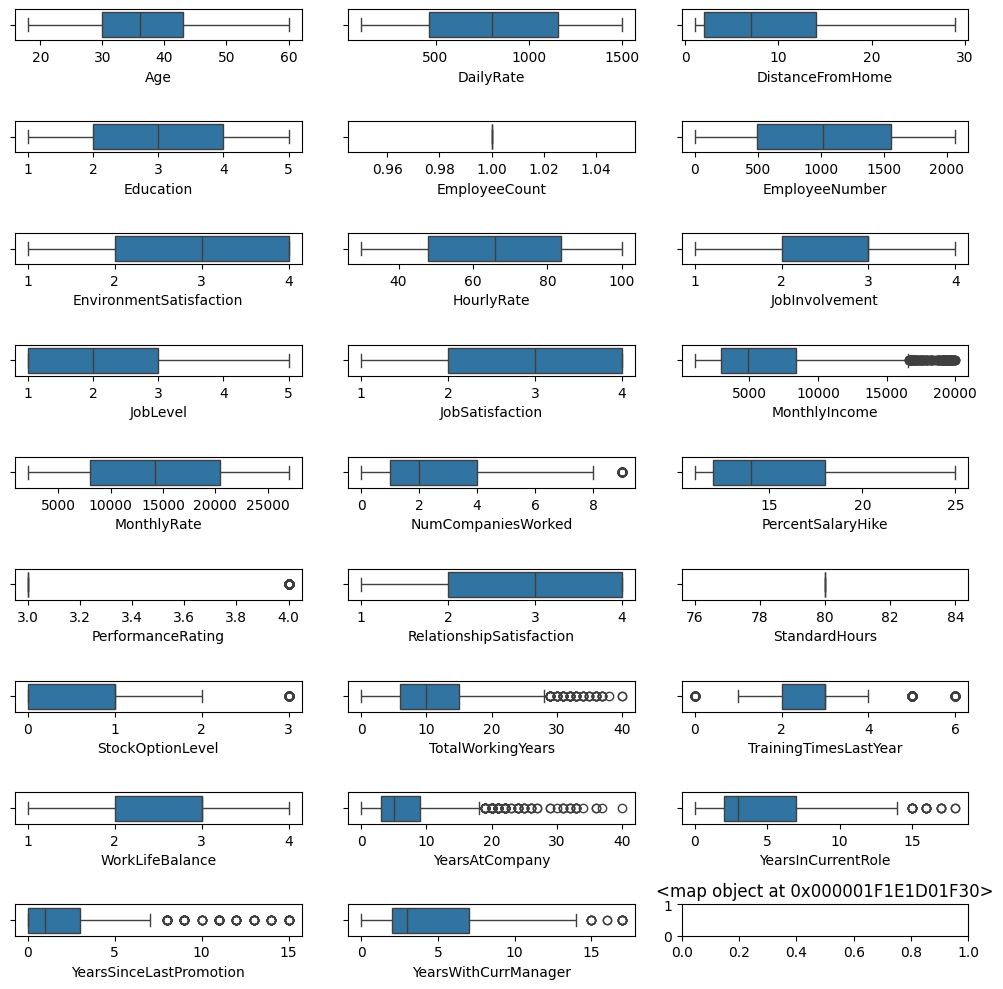

In [55]:
# outlier detection

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, ax = plt.subplots(9, 3, figsize = [10, 10])

col = iter(df.select_dtypes('int64'))

for i in range(9):
    for j in range(3):
        try:
            sns.boxplot(df, x = next(col), ax = ax[i, j])
            plt.title(col)
        except StopIteration as e:
            print(e)
plt.tight_layout()
plt.show()

In [56]:
# removing outliers

# creating a function to drop rows easily.

def drop_rows(rows: list[list]) -> None:
    for row in rows:
        match row[1]:
            case '>':
                df.drop(df[df[row[0]] > row[2]].index, inplace = True)
            case '<':
                df.drop(df[df[row[0]] < row[2]].index, inplace = True)
            case '=':
                df.drop(df[df[row[0]] == row[2]].index, inplace = True)
            
    df.reset_index(drop = True, inplace = True)

try:
    drop_rows([['YearsAtCompany', '>', 35], ['YearsSinceLastPromotion', '>', 5], ['YearsInCurrentRole', '>', 15]])
except:
    print(e)

In [57]:
# encode
# skew
# scaling
# engineering

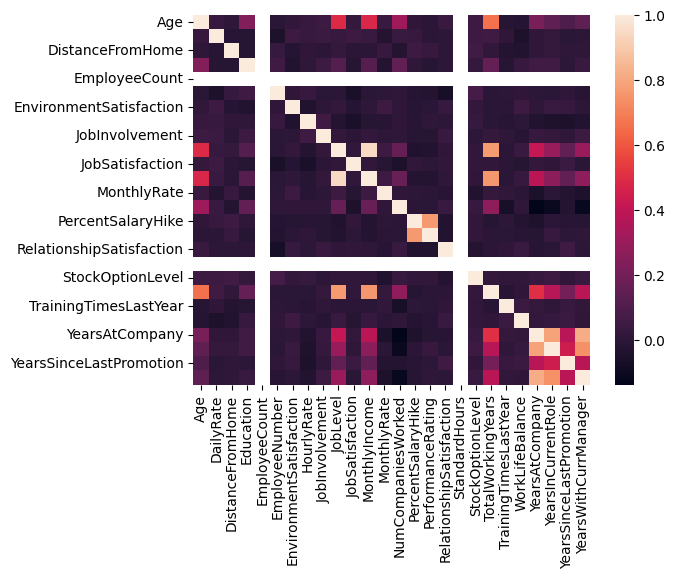

In [58]:
import seaborn as sns
import pandas as pd

plot_data = df.select_dtypes('int64').corr()
sns.heatmap(data =  plot_data)
plt.show() 

In [59]:
import seaborn as sns
import pandas as pd

plot_data = df.select_dtypes('int64')
# sns.pairplot(data =  plot_data)

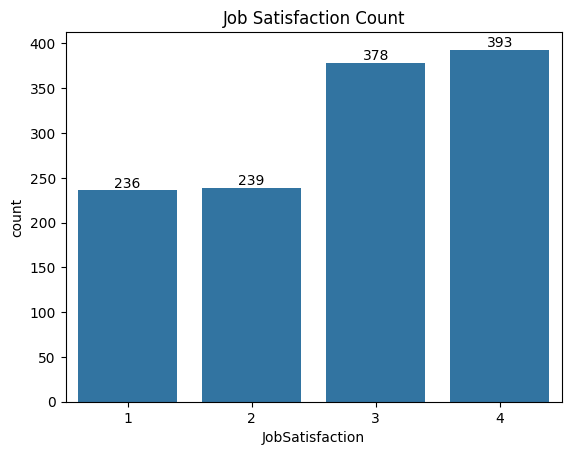

In [60]:
# countplot

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plot_data = df.select_dtypes('int64')

ax = sns.countplot(plot_data, x = 'JobSatisfaction')
plt.title('Job Satisfaction Count')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [61]:
plot_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Axes: xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>

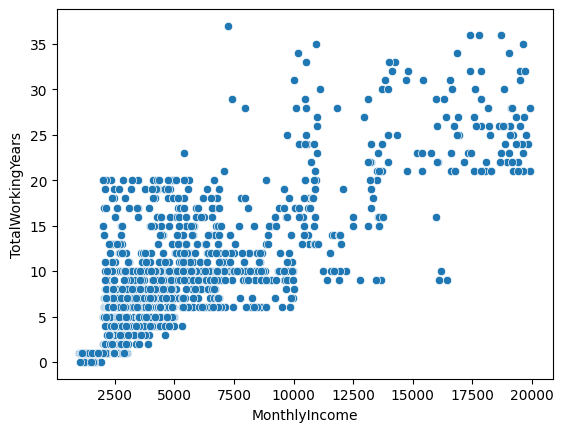

In [62]:
# scatterplot

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plot_data = df.select_dtypes('int64')

sns.scatterplot(data = plot_data, x = 'MonthlyIncome', y = 'TotalWorkingYears')

In [67]:
# scatterplot

import plotly.express as px
import pandas as pd

plot_data = df.select_dtypes('int64')

px.scatter(data_frame = plot_data, x = 'MonthlyIncome', y = 'TotalWorkingYears')
px.sunburst(data_frame=plot_data, )

In [68]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

# Assuming `df` is your DataFrame and you want to use 'MonthlyIncome' and 'TotalWorkingYears'
plot_data = df.select_dtypes('int64')

# Convert the DataFrame to a ColumnDataSource (Bokeh's equivalent of a data source)
source = ColumnDataSource(plot_data)

# Create a figure
p = figure(title="Scatter plot of MonthlyIncome vs TotalWorkingYears",
           x_axis_label='MonthlyIncome', y_axis_label='TotalWorkingYears')

# Add a scatter renderer (circle markers for each point)
p.scatter(x='MonthlyIncome', y='TotalWorkingYears', source=source, size=8, color="navy", alpha=0.5)

# Show the plot
show(p)


In [71]:
def hr_cat(data):
    if data < 60:
        return 'low'
    elif data >= 60 and data <= 70:
        return 'mid'
    else:
        return 'high'

df['HourlyRateCategory'] = pd.Series(map(hr_cat, df['HourlyRate']))

px.sunburst(data_frame = df, path = ['OverTime', 'HourlyRateCategory'])

In [72]:
df['MonthlyIncome'].describe()

count     1246.000000
mean      5921.862761
std       4294.468544
min       1009.000000
25%       2786.000000
50%       4568.000000
75%       6875.250000
max      19943.000000
Name: MonthlyIncome, dtype: float64

In [78]:
def salary_cat(data):
    if data < 2786:
        return 'minimal'
    elif data >= 2786 and data <= 4568:
        return 'low'
    elif data >= 4568 and data <= 6875:
        return 'mid'
    else:
        return 'high'
    
df['MonthlyIncomeCat'] = pd.Series(map(salary_cat, df['MonthlyIncome']))

px.sunburst(data_frame = df, path = ['MonthlyIncomeCat', 'OverTime', 'HourlyRateCategory'])